# Importação de bibliotecas

In [1]:
#Importação de bibliotecas
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score
from sklearn.metrics.pairwise import cosine_similarity
import statsmodels.api as sm

# Leitura e coleta de dados 

In [2]:
#Leitura e coleta de dados
df = pd.read_csv('dataset.csv')

In [3]:
#Visualização da base de dados
df.head()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
0,1973,1,Commerical,0.00,0.00,0.0,0.0,0.570,0.000,0.0,0.0,0.570,0.570,0.0,0.0,0.000,0.0
1,1973,1,Electric Power,0.00,0.49,0.0,0.0,0.054,0.157,0.0,0.0,0.211,89.223,0.0,0.0,88.522,0.0
2,1973,1,Industrial,1.04,0.00,0.0,0.0,98.933,0.000,0.0,0.0,98.933,99.973,0.0,0.0,0.000,0.0
3,1973,1,Residential,0.00,0.00,0.0,0.0,30.074,0.000,0.0,0.0,0.000,30.074,0.0,0.0,0.000,0.0
4,1973,1,Transportation,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0


In [4]:
#Contagem de linhas da base de dados
df.count()

Year                                  3065
Month                                 3065
Sector                                3065
Hydroelectric Power                   3065
Geothermal Energy                     3065
Solar Energy                          3065
Wind Energy                           3065
Wood Energy                           3065
Waste Energy                          3065
Fuel Ethanol, Excluding Denaturant    3065
Biomass Losses and Co-products        3065
Biomass Energy                        3065
Total Renewable Energy                3065
Renewable Diesel Fuel                 3065
Other Biofuels                        3065
Conventional Hydroelectric Power      3065
Biodiesel                             3065
dtype: int64

In [5]:
#Informações e propriedades estatísticas da base de dados
df.describe()

,Year,Month,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
count,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000
mean,1998.042414,6.491028,0.169759,1.146369,2.015008,4.282404,36.644408,5.820124,6.976648,4.834706,46.285969,70.872209,0.428949,0.031752,15.757374,0.953720
std,14.747378,3.456934,0.373819,1.550857,5.774511,18.124793,46.900639,8.247359,21.911920,15.601717,64.241520,71.197761,2.687850,0.258149,32.134059,3.985003
min,1973.000000,1.000000,-0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1985.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.483000,0.000000,0.000000,0.000000,0.258000,2.070000,0.000000,0.000000,0.000000,0.000000
50%,1998.000000,6.000000,0.000000,0.357000,0.004000,0.000000,12.062000,0.108000,0.007000,0.000000,9.716000,50.984000,0.000000,0.000000,0.000000,0.000000
75%,2011.000000,9.000000,0.036000,1.673000,0.774000,0.001000,51.808000,12.764000,1.283000,0.000000,89.359000,126.982000,0.000000,0.000000,0.000000,0.000000
max,2024.000000,12.000000,2.047000,5.951000,64.040000,157.409000,183.628000,32.875000,104.420000,75.373000,233.200000,308.175000,38.344000,4.101000,117.453000,27.871000


In [6]:
#Informações sobre a base de dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                3065 non-null   int64  
 1   Month                               3065 non-null   int64  
 2   Sector                              3065 non-null   object 
 3   Hydroelectric Power                 3065 non-null   float64
 4   Geothermal Energy                   3065 non-null   float64
 5   Solar Energy                        3065 non-null   float64
 6   Wind Energy                         3065 non-null   float64
 7   Wood Energy                         3065 non-null   float64
 8   Waste Energy                        3065 non-null   float64
 9   Fuel Ethanol, Excluding Denaturant  3065 non-null   float64
 10  Biomass Losses and Co-products      3065 non-null   float64
 11  Biomass Energy                      3065 no

In [7]:
df.dtypes

Year                                    int64
Month                                   int64
Sector                                 object
Hydroelectric Power                   float64
Geothermal Energy                     float64
Solar Energy                          float64
Wind Energy                           float64
Wood Energy                           float64
Waste Energy                          float64
Fuel Ethanol, Excluding Denaturant    float64
Biomass Losses and Co-products        float64
Biomass Energy                        float64
Total Renewable Energy                float64
Renewable Diesel Fuel                 float64
Other Biofuels                        float64
Conventional Hydroelectric Power      float64
Biodiesel                             float64
dtype: object

# Pré-processamento de dados

In [8]:
#Criação de função que realiza o pré-processamento de dados
def sectors():
    list_energy = []
    list_year = []
    list_month = []
    list_day = []
    dict_df = {}
    for year in range(1973,2025):
        for month in range(1,13):
            list_month.append(month)
            df_ = df[(df['Year'] == year) & (df['Month'] == month)][['Year','Month','Sector','Total Renewable Energy']]
            list_year.append(year)
            list_day.append(26)
            sum_energy = df_['Total Renewable Energy'].sum()
            list_energy.append(f'{sum_energy:.3f}')
    dict_df = {'Year': list_year,'Month':list_month,'Day':list_day,'Total Renewable Energy':list_energy}
    return dict_df

#Pré-processamento da base de dados
df = pd.read_csv('dataset.csv')

dataAll = sectors()

dataFrame_process = pd.DataFrame(dataAll)
dataFrame_process['Total Renewable Energy'] = dataFrame_process['Total Renewable Energy'].astype(float)

dataFrame_process['Data Time'] = pd.to_datetime(dataFrame_process[['Year','Month','Day']])
dataFrame_process = dataFrame_process[dataFrame_process['Total Renewable Energy'] != 0.000]

dataFrame_process.to_csv('data_per_month.csv', index=False)

dataFrame_process.dtypes
print(dataFrame_process.columns)
print(dataFrame_process)

Index(['Year', 'Month', 'Day', 'Total Renewable Energy', 'Data Time'], dtype='object')
     Year  Month  Day  Total Renewable Energy  Data Time
0    1973      1   26                 219.840 1973-01-26
1    1973      2   26                 197.330 1973-02-26
2    1973      3   26                 218.687 1973-03-26
3    1973      4   26                 209.330 1973-04-26
4    1973      5   26                 215.982 1973-05-26
..    ...    ...  ...                     ...        ...
608  2023      9   26                 499.536 2023-09-26
609  2023     10   26                 532.762 2023-10-26
610  2023     11   26                 519.638 2023-11-26
611  2023     12   26                 533.819 2023-12-26
612  2024      1   26                 521.761 2024-01-26

[613 rows x 5 columns]


# Visualização de série temporal e suas propriedades estatísticas

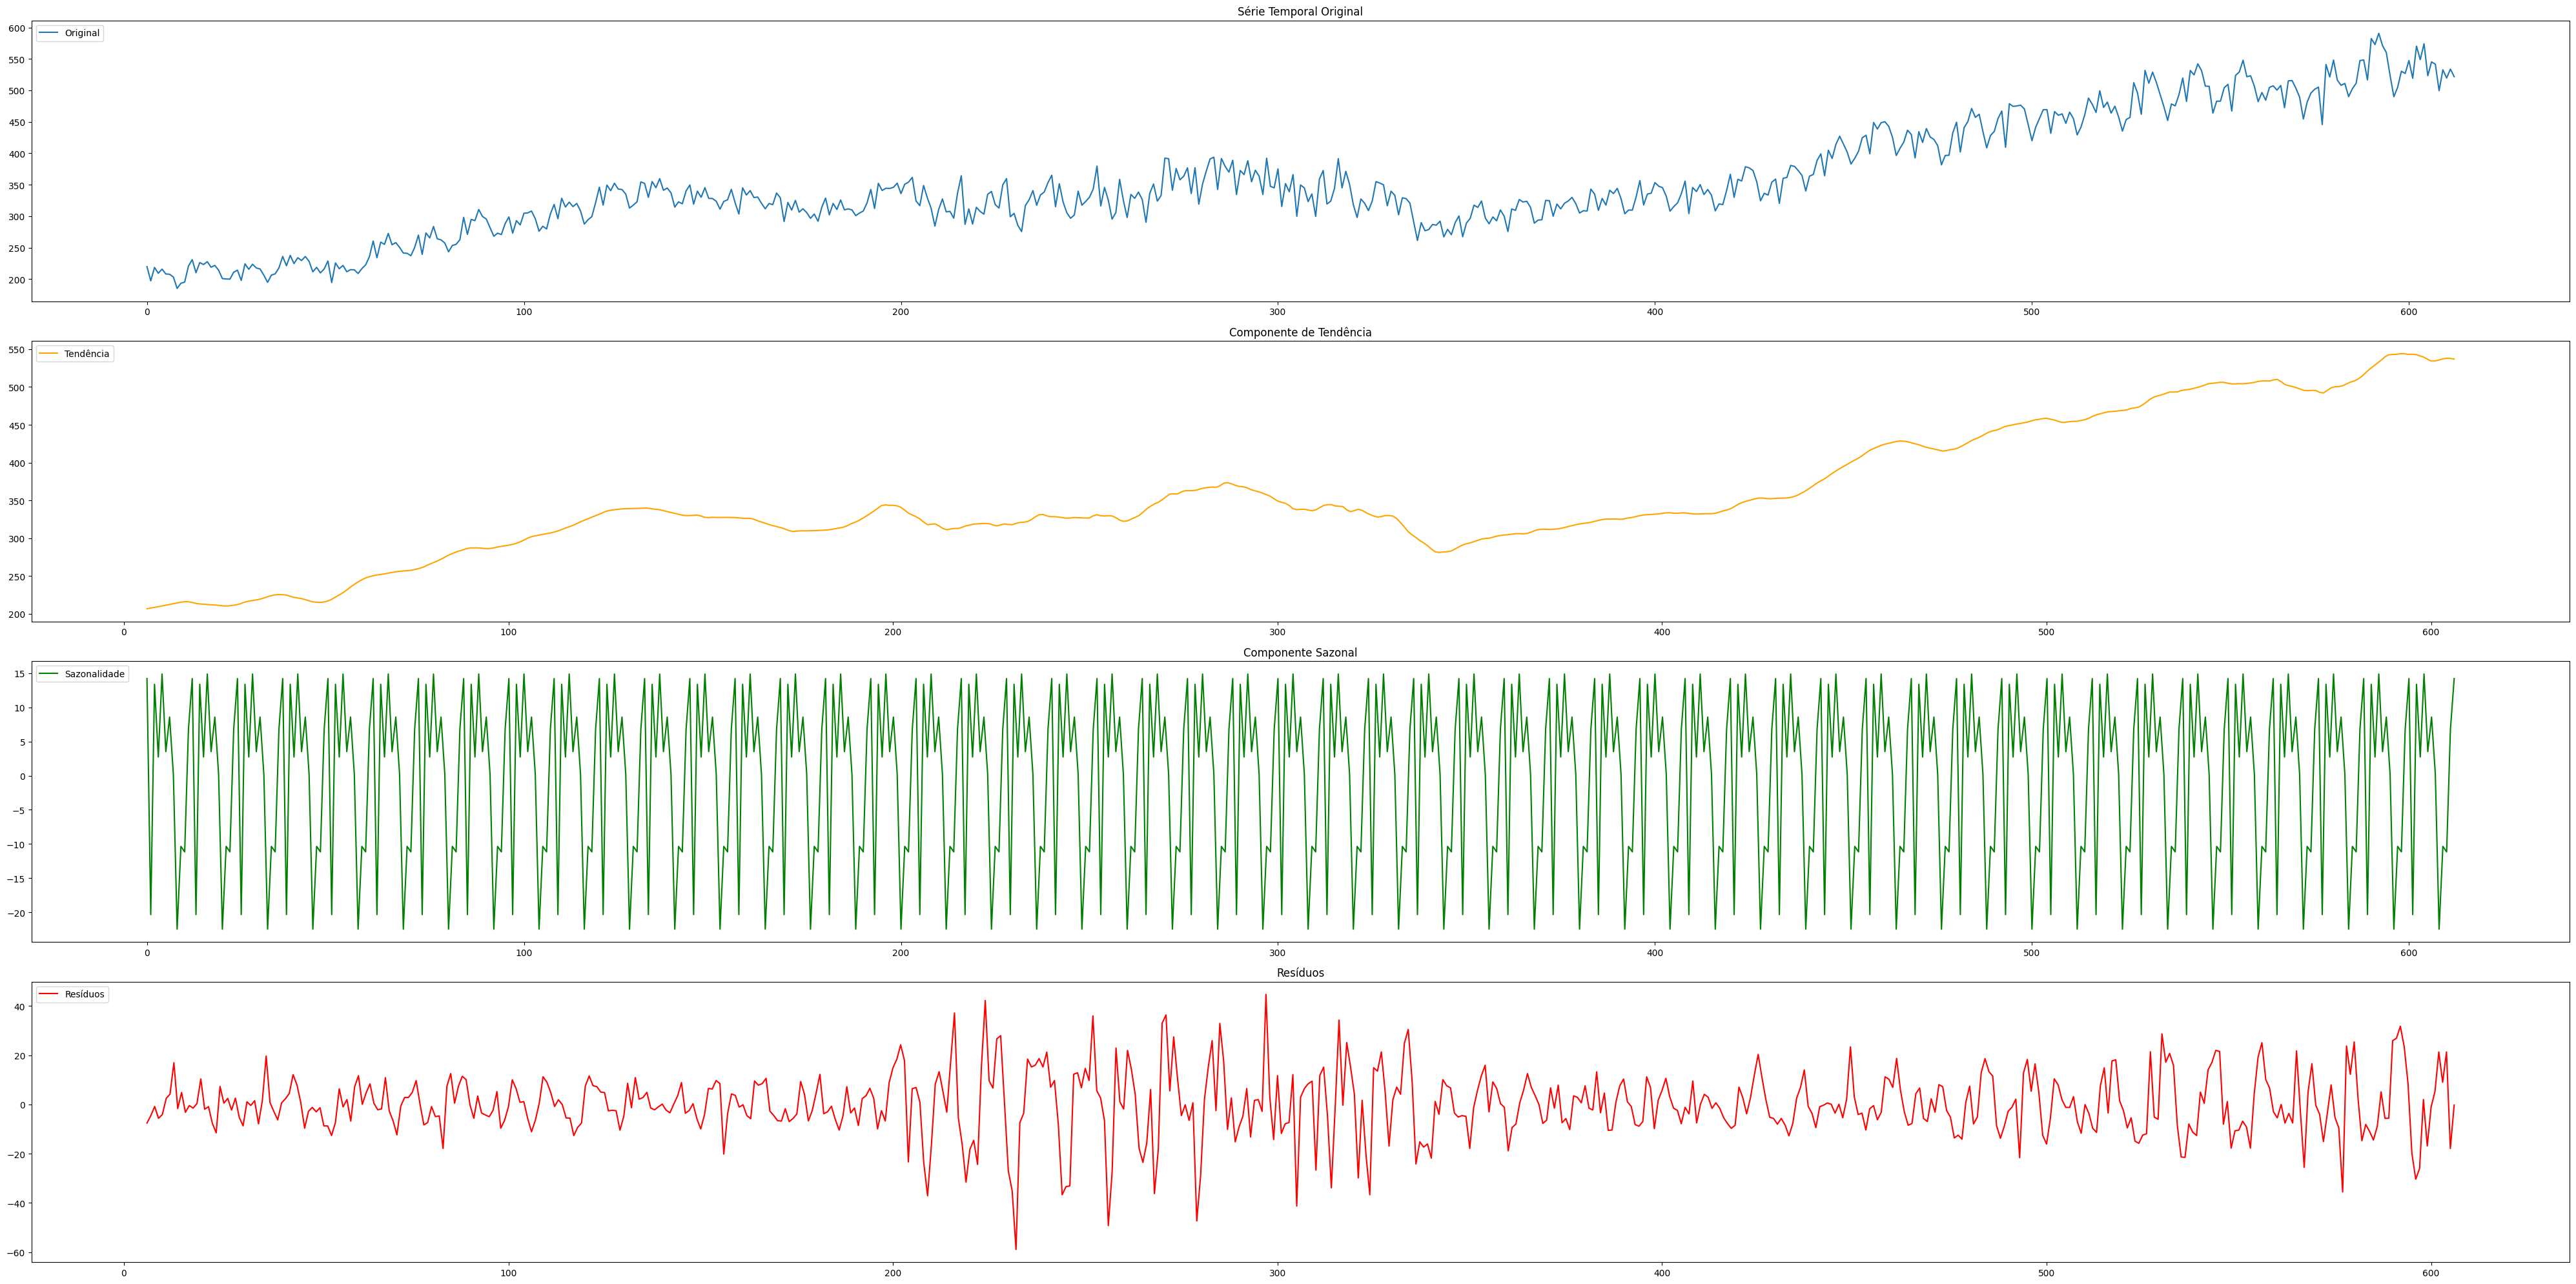

In [9]:
# Decompondo a série temporal
decomposicao = seasonal_decompose(dataFrame_process['Total Renewable Energy'], model='additive', period=12)  # 'period=12' para sazonalidade anual # Talvez mudar sazonalidade?

# Plotando os componentes
plt.figure(figsize=(40, 20))

plt.subplot(411)
plt.plot(dataFrame_process['Total Renewable Energy'], label='Original')
plt.legend(loc='upper left')
plt.title('Série Temporal Original')

plt.subplot(412)
plt.plot(decomposicao.trend, label='Tendência', color='orange')
plt.legend(loc='upper left')
plt.title('Componente de Tendência')

plt.subplot(413)
plt.plot(decomposicao.seasonal, label='Sazonalidade', color='green')
plt.legend(loc='upper left')
plt.title('Componente Sazonal')

plt.subplot(414)
plt.plot(decomposicao.resid, label='Resíduos', color='red')
plt.legend(loc='upper left')
plt.title('Resíduos')

plt.tight_layout()
plt.show()


In [10]:
#Média dos resíduos da série temporal
np.mean(decomposicao.resid)

0.012056736111130473

In [11]:
#Desvio padrão dos resíduos da série temporal
np.std(decomposicao.resid)

12.904094420434747

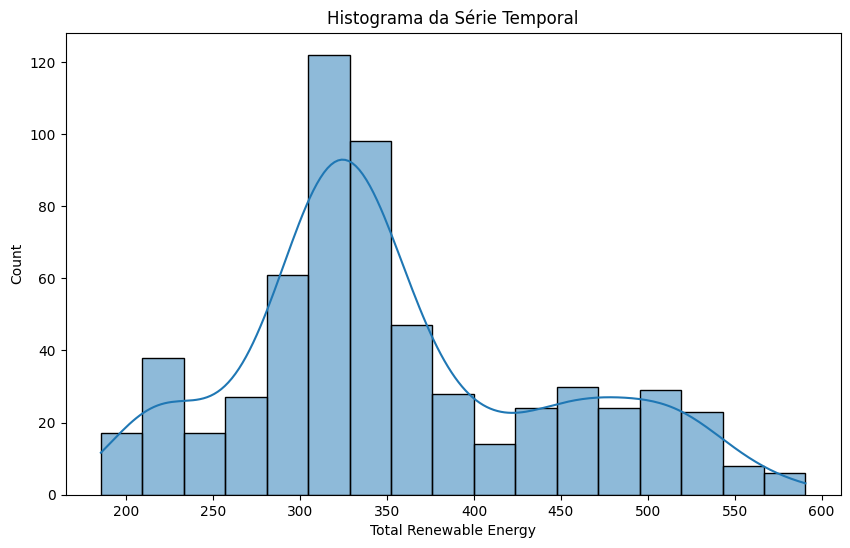

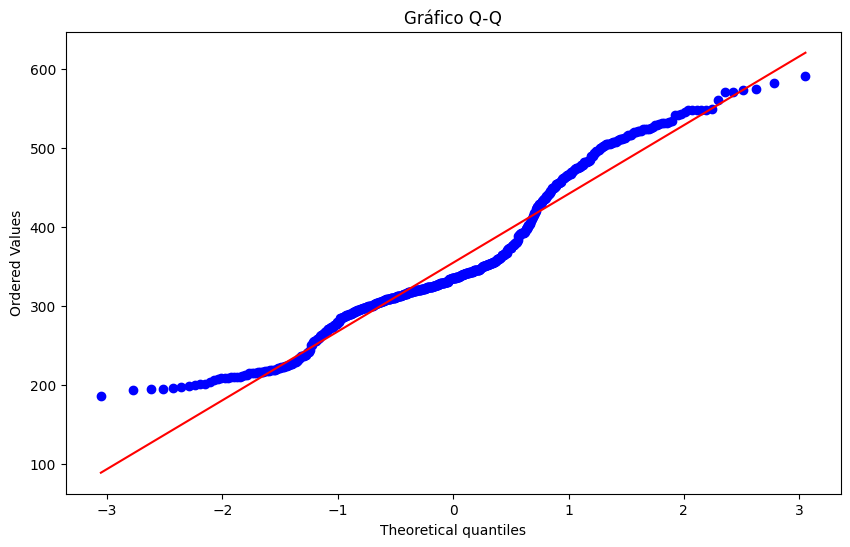

Shapiro-Wilk Teste
Estatística: 0.9481498124206729
Valor-p: 7.851643982381795e-14

Teste de Kolmogorov-Smirnov
Estatística: 1.0
Valor-p: 0.0

Teste de Anderson-Darling
Estatística: 13.02325552539719
Valores Críticos: [0.572 0.652 0.782 0.912 1.085]
Resultado: [15.  10.   5.   2.5  1. ]


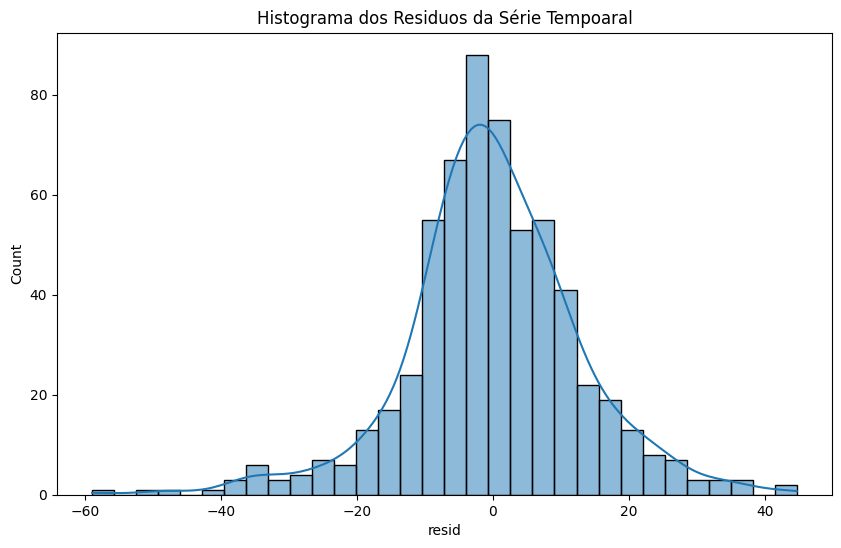

In [12]:
# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(dataFrame_process['Total Renewable Energy'], kde=True)
plt.title('Histograma da Série Temporal')
plt.show()

# Gráfico Q-Q
plt.figure(figsize=(10, 6))
stats.probplot(dataFrame_process['Total Renewable Energy'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q')
plt.show()

# Teste de Shapiro-Wilk
shapiro_test = stats.shapiro(dataFrame_process['Total Renewable Energy'])
print('Shapiro-Wilk Teste')
print('Estatística:', shapiro_test.statistic)
print('Valor-p:', shapiro_test.pvalue)

# Teste de Kolmogorov-Smirnov
ks_test = stats.kstest(dataFrame_process['Total Renewable Energy'], 'norm')
print('\nTeste de Kolmogorov-Smirnov')
print('Estatística:', ks_test.statistic)
print('Valor-p:', ks_test.pvalue)

# Teste de Anderson-Darling
ad_test = stats.anderson(dataFrame_process['Total Renewable Energy'], dist='norm')
print('\nTeste de Anderson-Darling')
print('Estatística:', ad_test.statistic)
print('Valores Críticos:', ad_test.critical_values)
print('Resultado:', ad_test.significance_level)

# Histograma de resíduos 
plt.figure(figsize=(10, 6))
sns.histplot(decomposicao.resid, kde=True)
plt.title('Histograma dos Residuos da Série Tempoaral')
plt.show()

# Transformação da base de dados

### Diferenciação e Transformação Logarítmica

In [13]:
data = dataFrame_process['Total Renewable Energy']
# Executar o teste ADF na série original
result = adfuller(data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Transformação Logarítmica
log_data = np.log(data)

# Verificando a série transformada
print(log_data)

ADF Statistic: -0.3476306025138657
p-value: 0.9184822690134047
0      5.392900
1      5.284877
2      5.387641
3      5.343912
4      5.375195
         ...   
608    6.213680
609    6.278075
610    6.253132
611    6.280057
612    6.257210
Name: Total Renewable Energy, Length: 613, dtype: float64


### Grafícos de autocorrelação (ACF e PACF)

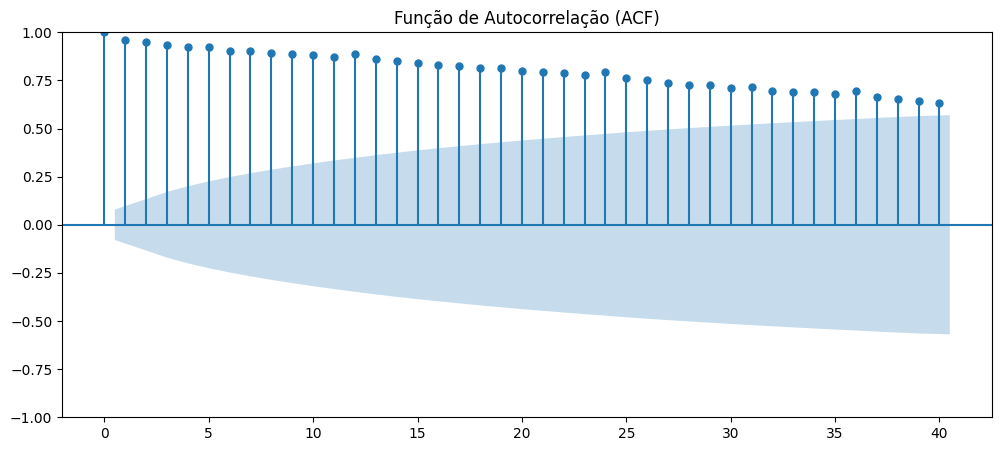

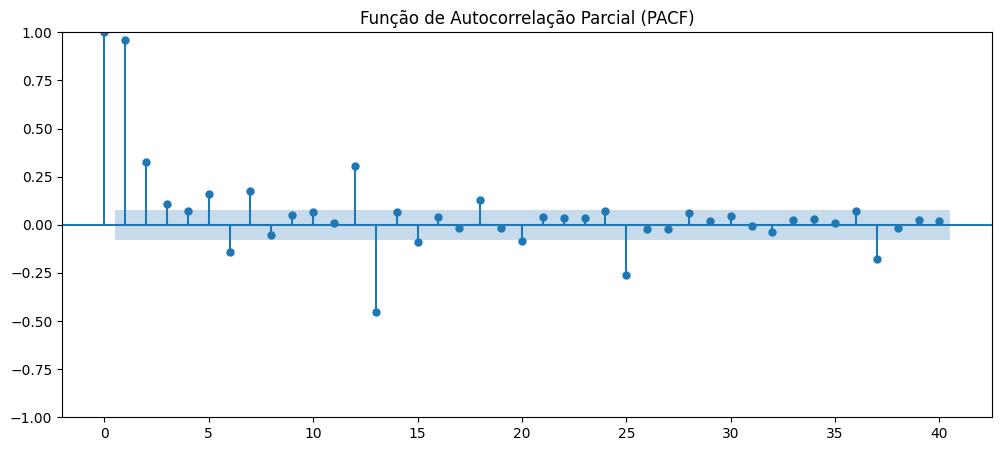

In [14]:
#ACF E PACF antes da transformação dos dados
# Plotar a função de autocorrelação (ACF)
plt.figure(figsize=(12, 5))
plot_acf(log_data, lags=40, ax=plt.gca())
plt.title('Função de Autocorrelação (ACF)')
plt.show()

# Plotar a função de autocorrelação parcial (PACF)
plt.figure(figsize=(12, 5))
plot_pacf(log_data, lags=40, ax=plt.gca())
plt.title('Função de Autocorrelação Parcial (PACF)')
plt.show()

### Aplicação da diferenciação

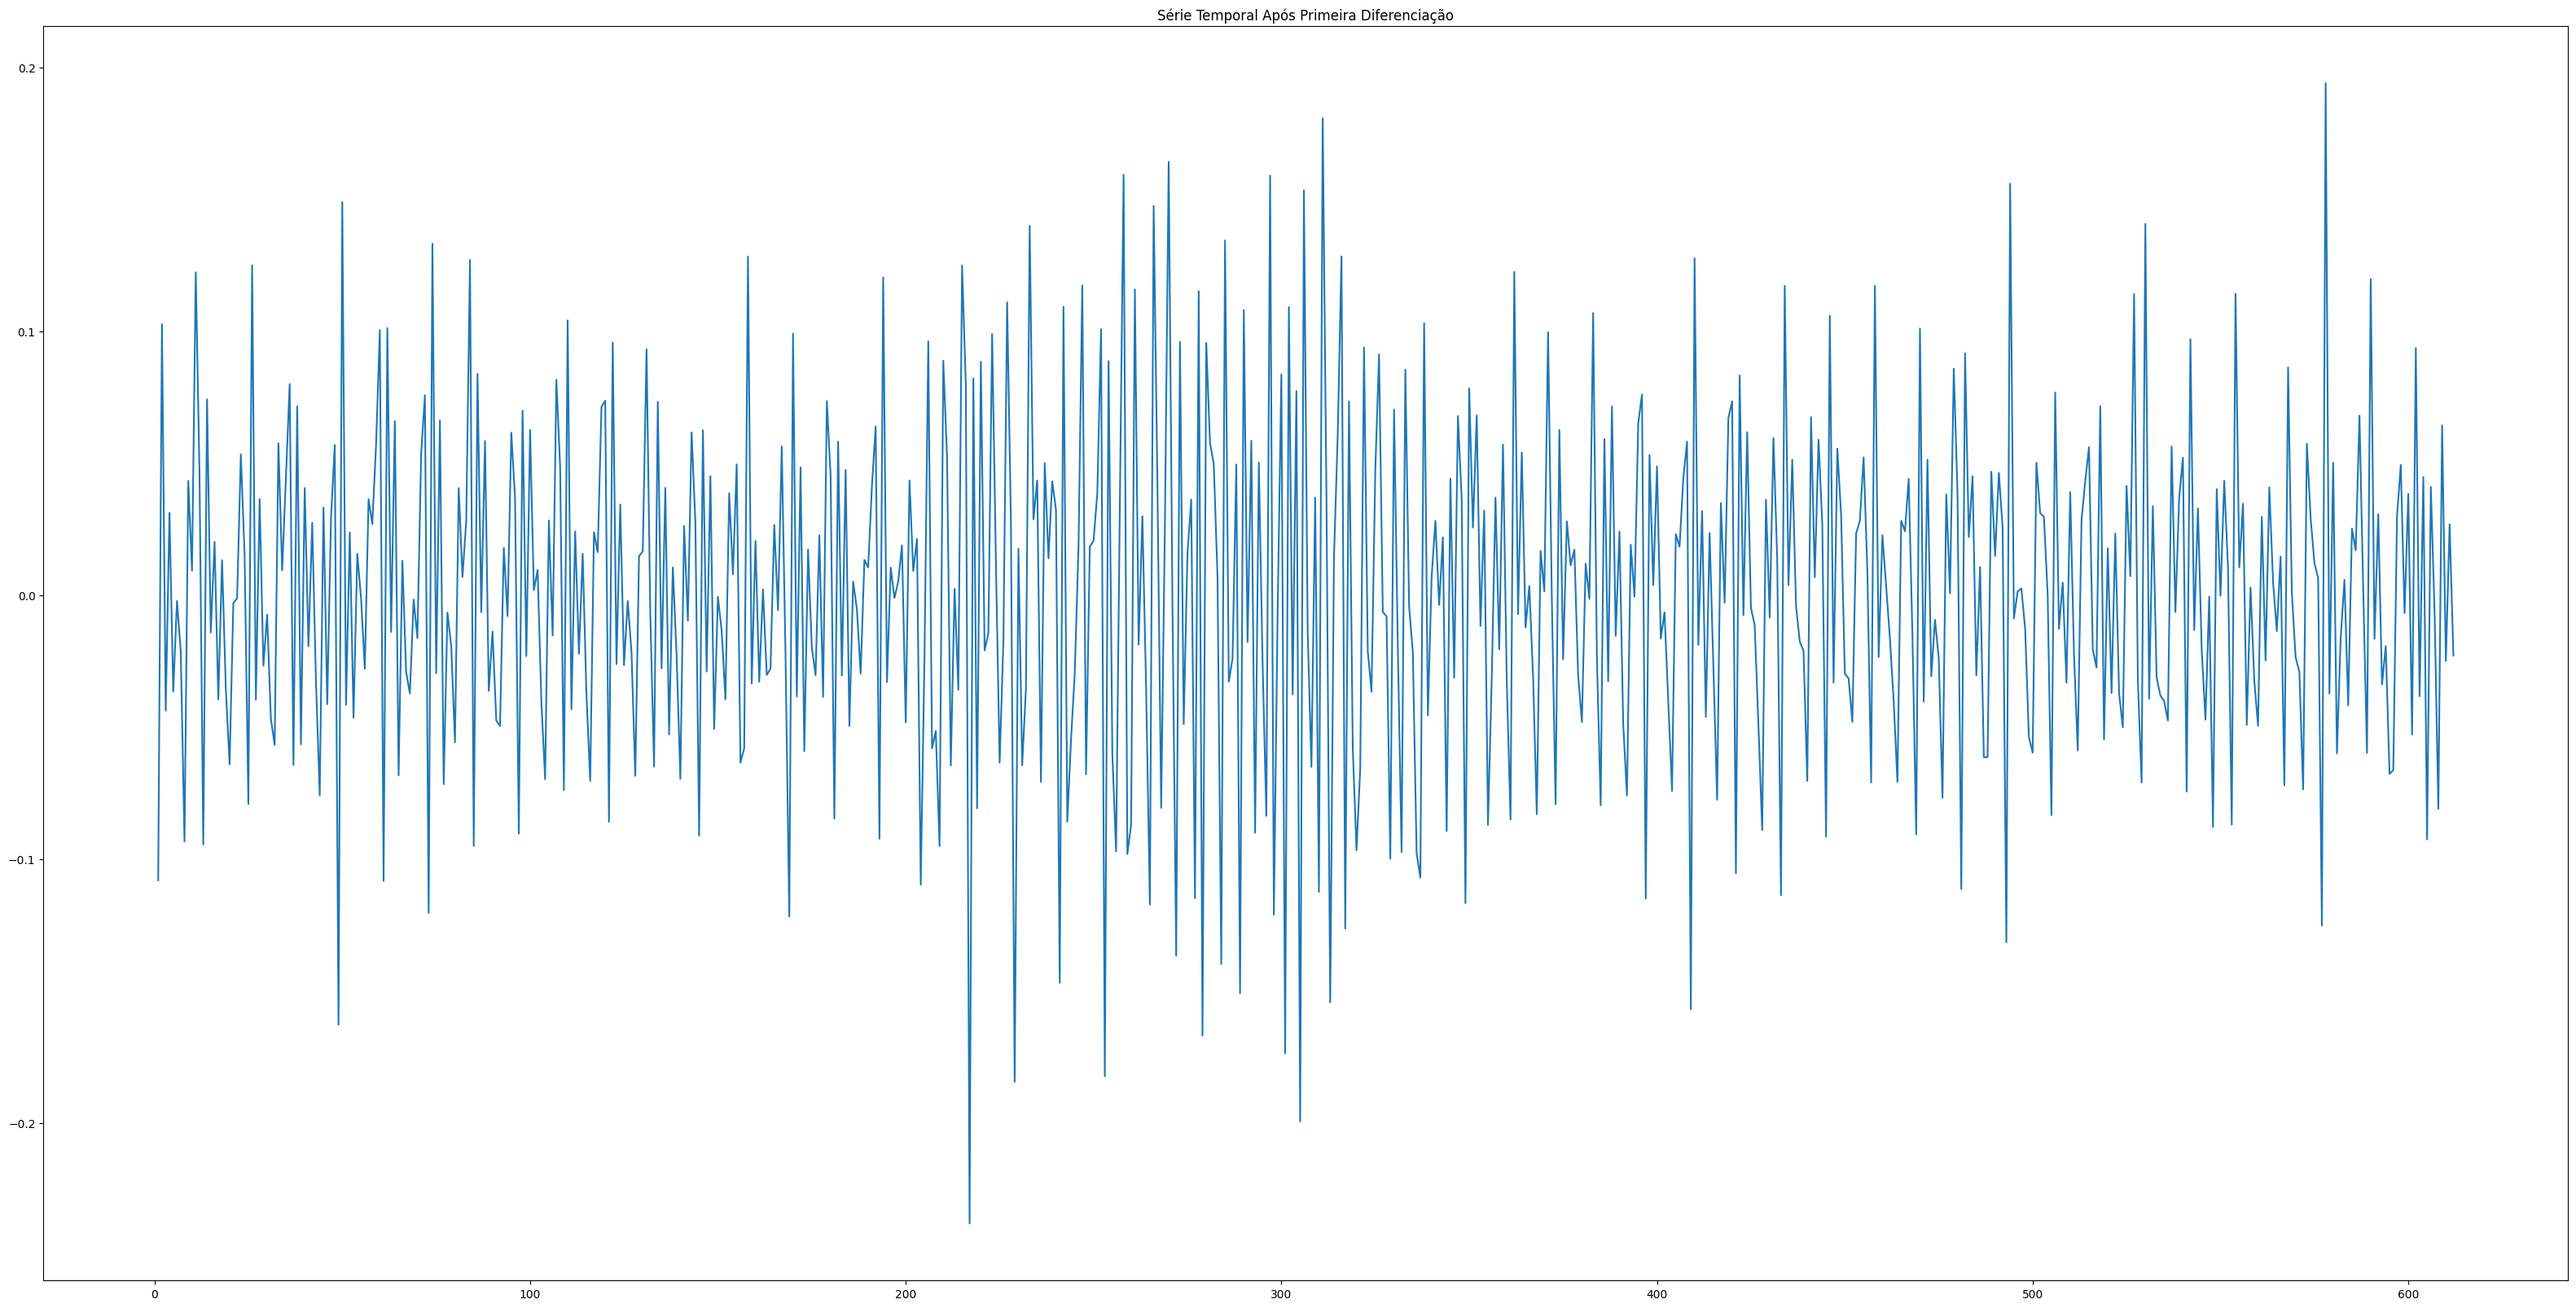

ADF Statistic: -6.850250011870762
p-value: 1.7015061255280695e-09
1     -0.108023
2      0.102764
3     -0.043730
4      0.031283
5     -0.036461
         ...   
608   -0.080959
609    0.064395
610   -0.024942
611    0.026924
612   -0.022847
Name: Total Renewable Energy, Length: 612, dtype: float64


In [15]:
# Aplicar a primeira diferenciação
initial_value = log_data.loc[0]
data_diff1 = log_data.diff().dropna()

# Plotar a série diferenciada
plt.figure(figsize=(40, 20))
plt.plot(data_diff1)
plt.title('Série Temporal Após Primeira Diferenciação')
plt.show()

# Executar o teste ADF na série diferenciada
result_diff1 = adfuller(data_diff1)
print('ADF Statistic:', result_diff1[0])
print('p-value:', result_diff1[1])

print(data_diff1)

# Aplicação do modelo SARIMA

### Divisão dos dados para treino e teste

In [16]:
train_size = int(len(data_diff1) * 0.8)  # 80% treino, 20% teste
train, test = data_diff1[:train_size], data_diff1[train_size:]

### Plot dos gráficos de Autocorrelação (ACF E PACF)

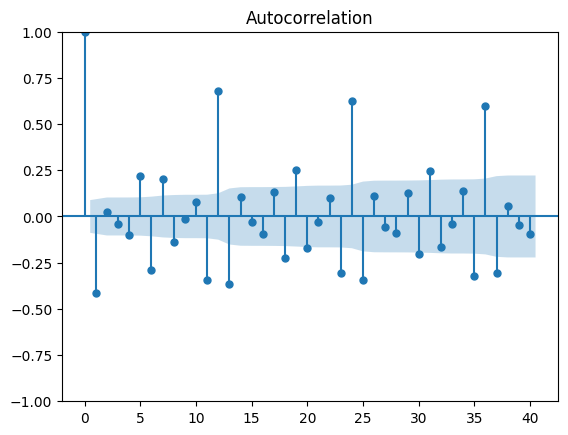

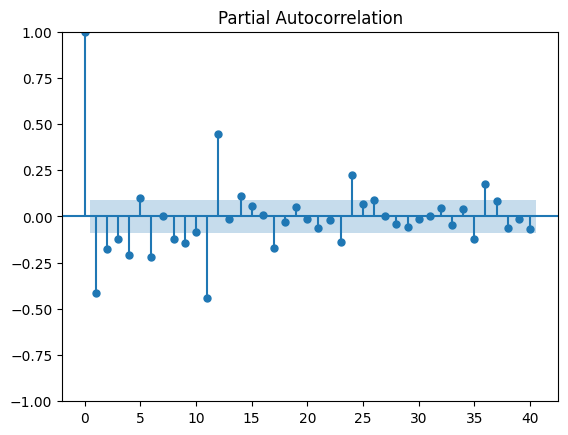

In [17]:
sm.graphics.tsa.plot_acf(train, lags=40)
sm.graphics.tsa.plot_pacf(train, lags=40)
plt.show()

### Aplicação do modelo SARIMA

C:\Users\olihe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\olihe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\olihe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge

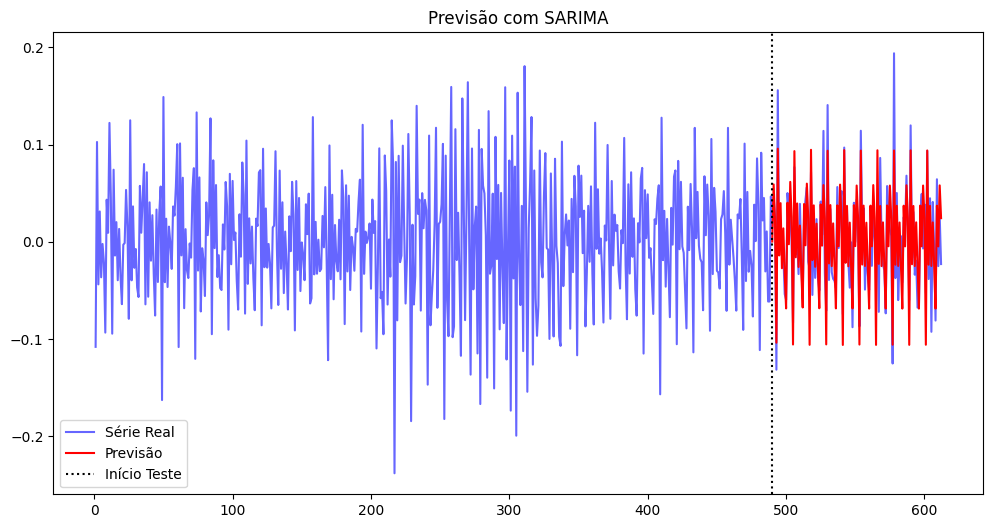

In [18]:
# Criar e treinar o modelo com os dados de treino
model = SARIMAX(train, order=(4, 1, 2), seasonal_order=(3, 1, 2, 12))
result = model.fit()

# Fazer previsões
forecast = result.predict(start=len(train), end=len(data_diff1) - 1, dynamic=False)

plt.figure(figsize=(12, 6))

plt.plot(data_diff1.index, data_diff1, label="Série Real", color='blue', alpha=0.6)
plt.plot(test.index, forecast, label="Previsão", color='red')

plt.axvline(data_diff1.index[train_size], color='black', linestyle="dotted", label="Início Teste")
plt.title("Previsão com SARIMA")
plt.legend()
plt.show()

### Resultados da predição estipulando os paramêtros manualmente

R^2: 0.7603152020243953
RMSE: 21.93940171532138
Similaridade de Cosseno: 0.9993488685617858
Desvio Padrão (Valores Reais): 44.81305331615975
Desvio Padrão (Valores Preditos): 42.44079681409096


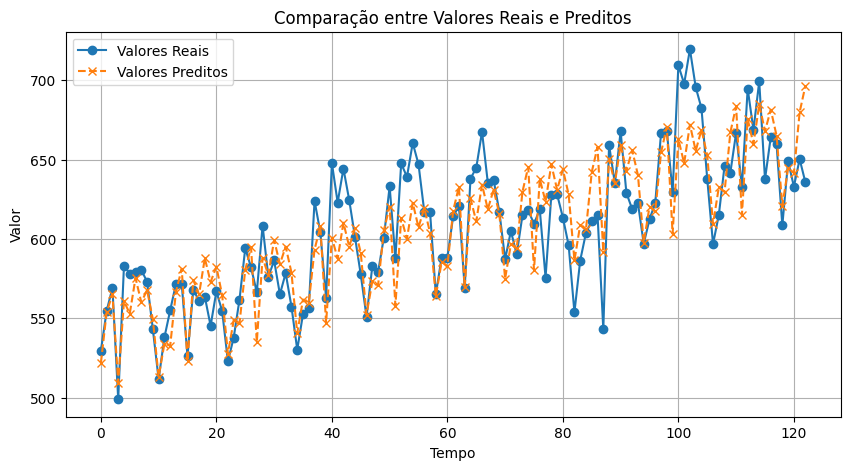

In [19]:
# Ajuste do modelo SARIMA

# Pegando o último valor antes da diferenciação
data_log = np.array(log_data)
last_value_log = data_log[-1]

# Para reverter a diferenciação
series_reverted_log = np.concatenate(([last_value_log], last_value_log + np.cumsum(data_diff1)))

y_true_differenced = np.array(test)
y_pred_differenced = np.array(forecast)

y_true_log = [last_value_log]
y_pred_log = [last_value_log]

for i in range(len(y_true_differenced)):
    y_true_log.append(y_true_log[-1] + y_true_differenced[i])
    y_pred_log.append(y_pred_log[-1] + y_pred_differenced[i])

y_true_log = np.array(y_true_log[1:])
y_pred_log = np.array(y_pred_log[1:])

# Aplicando a reversão da transformação logarítmica
y_true = np.exp(y_true_log)
y_pred = np.exp(y_pred_log)

# Calcular R^2
r2 = r2_score(y_true, y_pred)
print(f'R^2: {r2}')

# Calcular RMSE
rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
print(f'RMSE: {rmse}')

# Calcular Similaridade de Cosseno
y_true_reshaped = y_true.reshape(1, -1)
y_pred_reshaped = y_pred.reshape(1, -1)
cosine_sim = cosine_similarity(y_true_reshaped, y_pred_reshaped)[0][0]
print(f'Similaridade de Cosseno: {cosine_sim}')

# Calcular Desvio Padrão
y_true_std = np.std(y_true)
y_pred_std = np.std(y_pred)
print(f'Desvio Padrão (Valores Reais): {y_true_std}')
print(f'Desvio Padrão (Valores Preditos): {y_pred_std}')

# Plotando o gráfico
plt.figure(figsize=(10, 5))
plt.plot(y_true, label='Valores Reais', linestyle='-', marker='o')
plt.plot(y_pred, label='Valores Preditos', linestyle='--', marker='x')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.title('Comparação entre Valores Reais e Preditos')
plt.legend()
plt.grid()
plt.show()


In [20]:
y_pred

array([521.9404293 , 553.7064757 , 565.2489674 , 509.53955656,
       560.7996062 , 553.01045566, 575.47659506, 560.0754667 ,
       567.90810952, 549.38390635, 513.02791071, 534.08635628,
       532.77327221, 566.68189757, 581.27948661, 523.02385838,
       574.20320655, 565.15294467, 587.92770303, 572.92093435,
       582.59959404, 564.66368306, 527.80589445, 548.77679137,
       546.83130003, 580.58662477, 594.87342585, 535.07503999,
       588.23214154, 577.31891401, 599.3963359 , 584.22621395,
       595.25808288, 578.88862112, 540.66272554, 561.87315118,
       559.69052737, 593.35106857, 607.95456109, 547.09094674,
       600.85795407, 587.66460691, 610.32006917, 595.26500526,
       606.68086556, 591.30521818, 552.19110863, 573.30686665,
       570.79158474, 605.42024605, 620.45339969, 558.01911171,
       613.24386127, 600.16617443, 622.79193318, 607.35358508,
       619.50102542, 603.89308913, 563.89895142, 585.56613325,
       583.00580886, 617.78773495, 632.97063046, 569.49

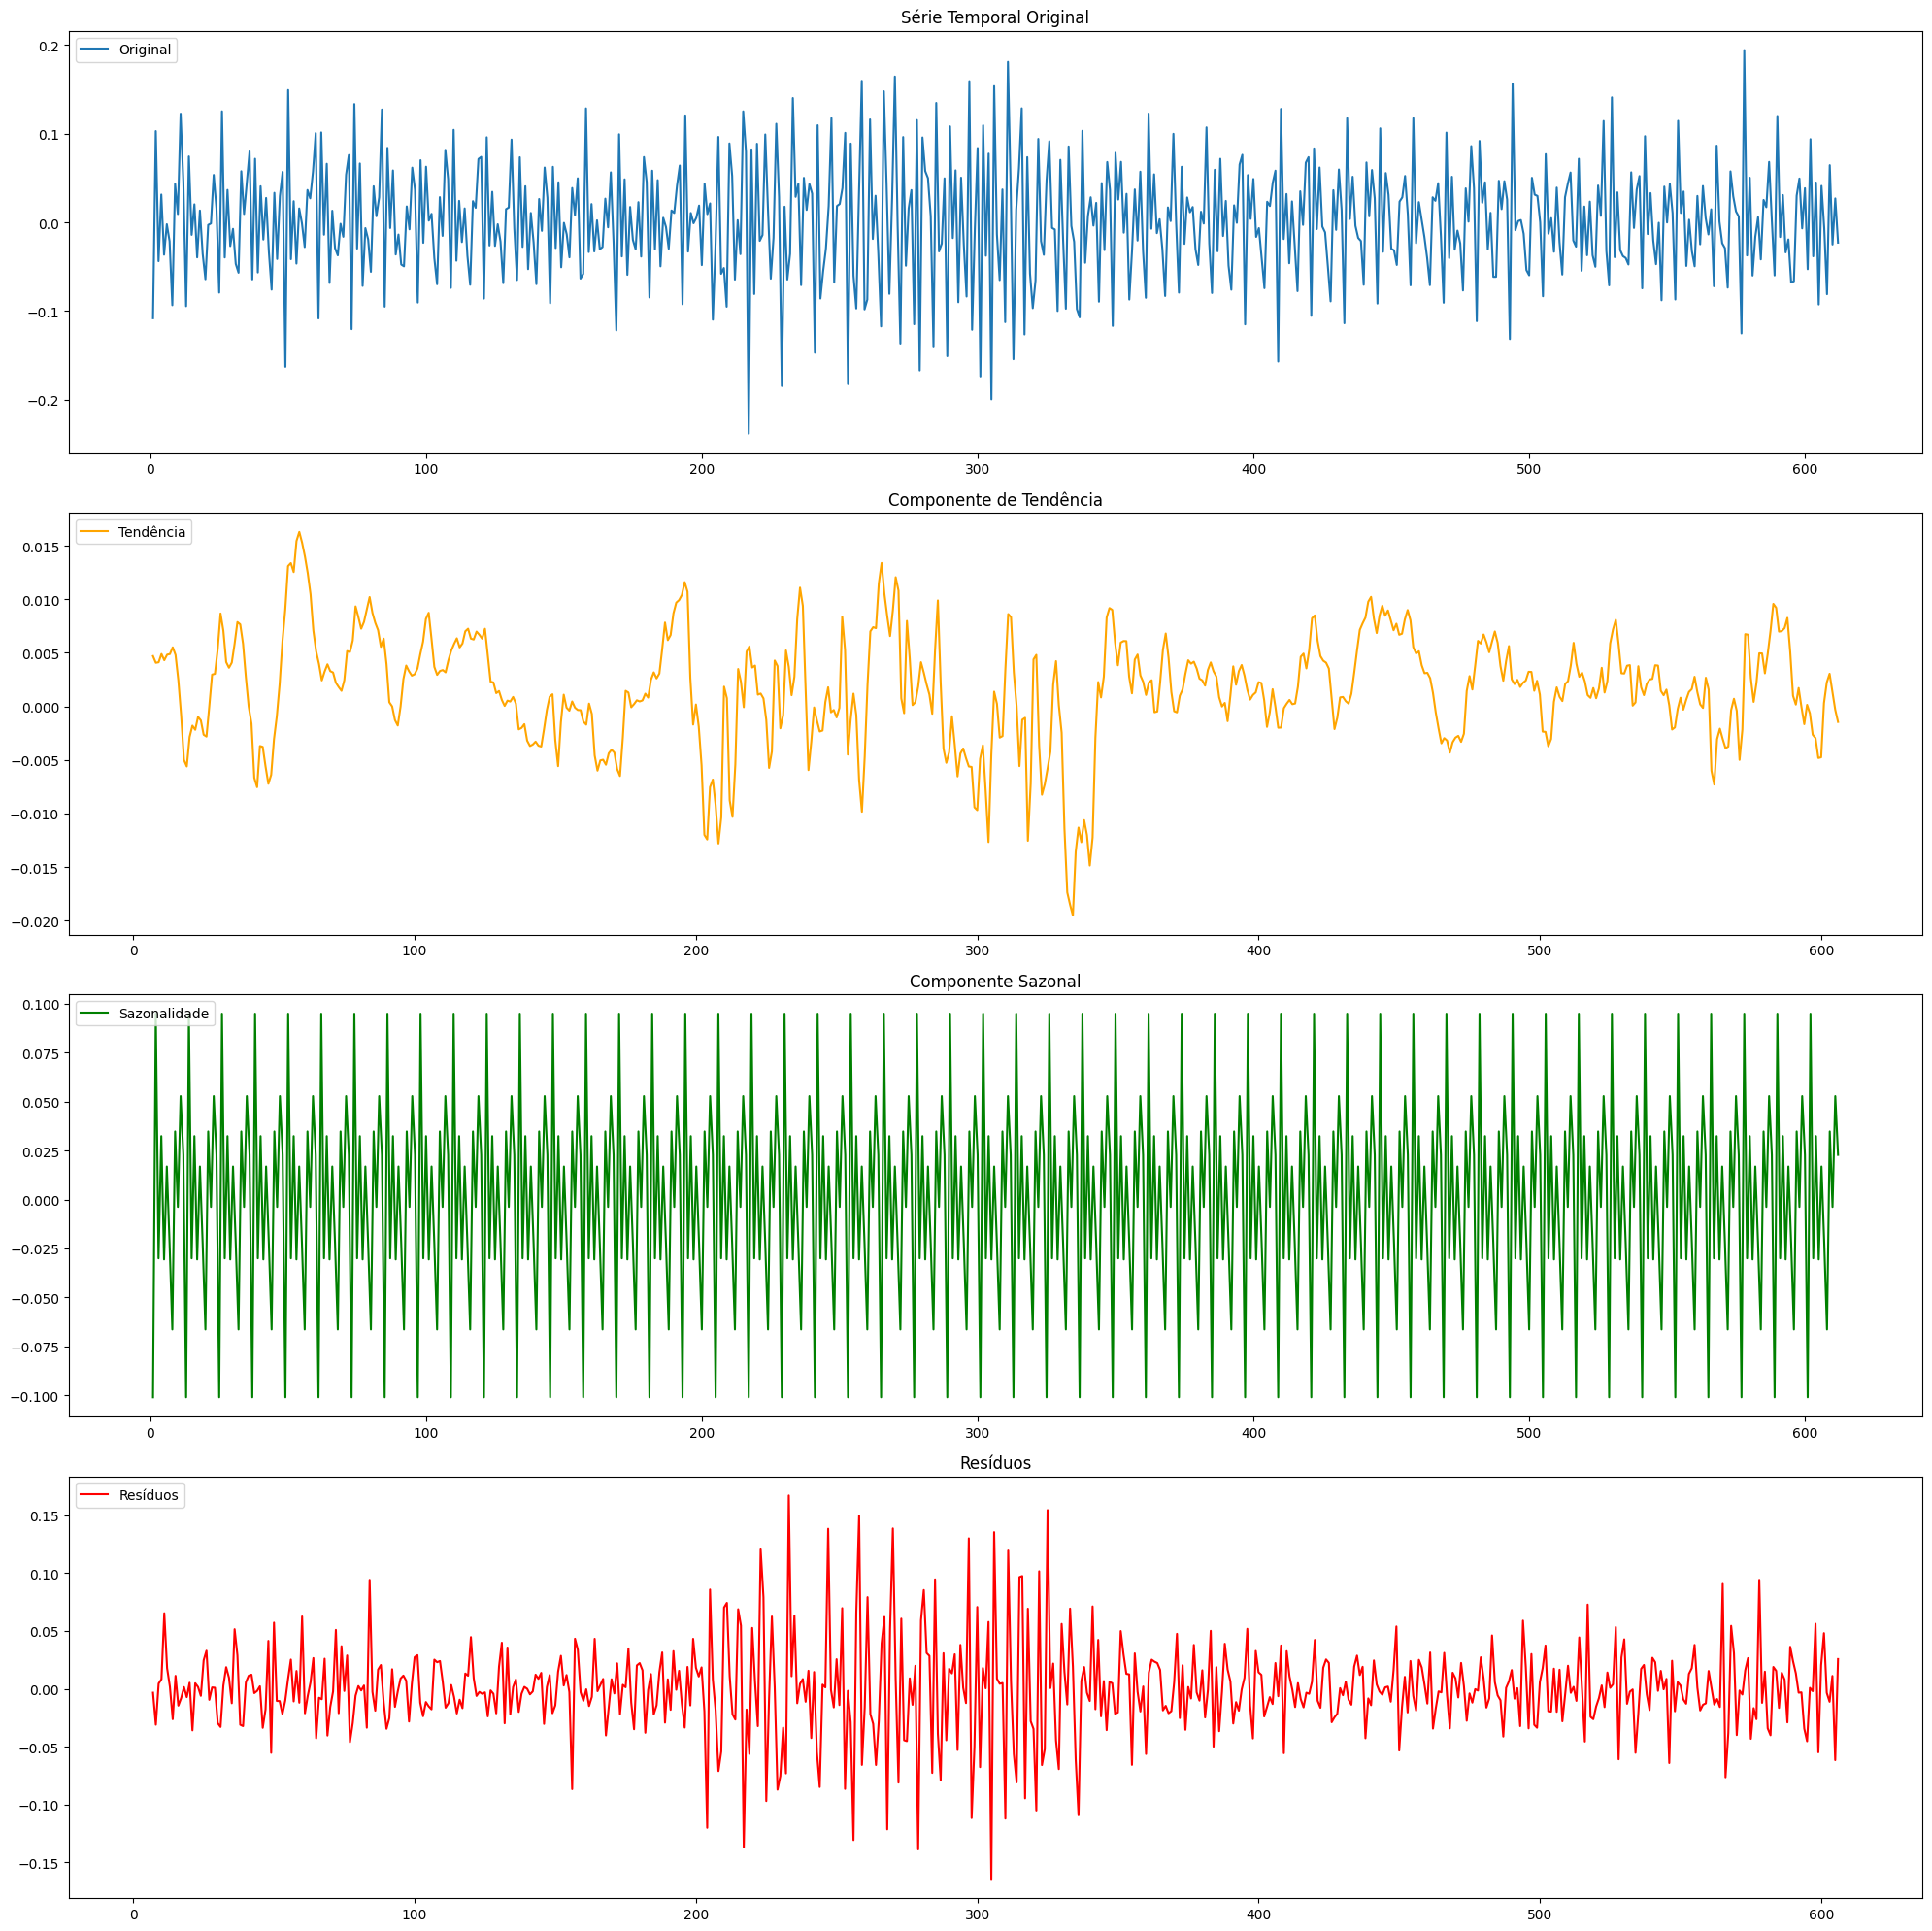

In [21]:

# Decompondo a série temporal
decomposicao = seasonal_decompose(data_diff1, model='additive', period=12)  # 'period=12' para sazonalidade anual

# Plotando os componentes
plt.figure(figsize=(20, 20))

plt.subplot(411)
plt.plot(data_diff1, label='Original')
plt.legend(loc='upper left')
plt.title('Série Temporal Original')

plt.subplot(412)
plt.plot(decomposicao.trend, label='Tendência', color='orange')
plt.legend(loc='upper left')
plt.title('Componente de Tendência')

plt.subplot(413)
plt.plot(decomposicao.seasonal, label='Sazonalidade', color='green')
plt.legend(loc='upper left')
plt.title('Componente Sazonal')

plt.subplot(414)
plt.plot(decomposicao.resid, label='Resíduos', color='red')
plt.legend(loc='upper left')
plt.title('Resíduos')

plt.tight_layout()
plt.show()

### Resultados da predição usando o Auto-ARIMA

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-1711.890, Time=0.94 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-1247.047, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-1583.481, Time=0.38 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-1500.378, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-1248.847, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=-1505.943, Time=0.77 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=-1618.964, Time=0.78 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=-1708.480, Time=1.94 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=-1709.186, Time=2.05 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=-1381.799, Time=0.34 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=-1563.199, Time=1.85 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=-1674.917, Time=1.91 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=-1716.439, Time=2.21 sec
 ARIMA(1,0,2)(2,0,2)[12] intercept   : AIC=-1718.260, Time=2.17 sec
 ARIM

C:\Users\olihe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\olihe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


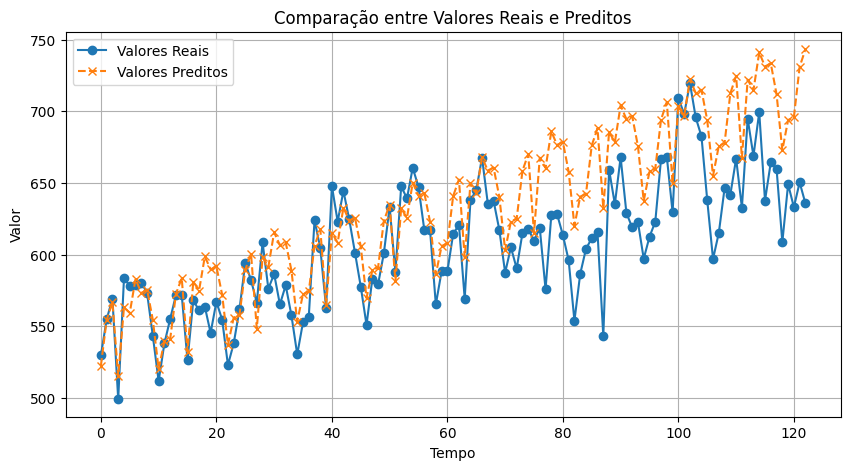

In [22]:

# Ajuste do modelo SARIMA
train, test = model_selection.train_test_split(data_diff1, test_size=0.2)
modelo_sarima = pm.auto_arima(train, 
                              seasonal=True, m=12, 
                              trace=True, 
                              error_action='ignore',
                              suppress_warnings=True,
                              stepwise=True)

# Resumo do modelo SARIMA
print(modelo_sarima.summary())

# Faça previsões com o modelo ajustado
previsoes_sarima = modelo_sarima.predict(n_periods=len(test))

# Pegando o último valor antes da diferenciação
data_log = np.array(log_data)
last_value_log = data_log[-1]

# Para reverter a diferenciação
series_reverted_log = np.concatenate(([last_value_log], last_value_log + np.cumsum(data_diff1)))

y_true_differenced = np.array(test)
y_pred_differenced = np.array(previsoes_sarima)

y_true_log = [last_value_log]
y_pred_log = [last_value_log]

for i in range(len(y_true_differenced)):
    y_true_log.append(y_true_log[-1] + y_true_differenced[i])
    y_pred_log.append(y_pred_log[-1] + y_pred_differenced[i])

y_true_log = np.array(y_true_log[1:])
y_pred_log = np.array(y_pred_log[1:])

# Aplicando a reversão da transformação logarítmica
y_true = np.exp(y_true_log)
y_pred = np.exp(y_pred_log)

print(y_true)
print(y_pred)

# Calcular R^2
r2 = r2_score(y_true, y_pred)
print(f'R^2: {r2}')

# Calcular RMSE
rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
print(f'RMSE: {rmse}')

#Calcular Desvio Padrao
std_value = np.std(y_pred)

# Calcular Similaridade de Cosseno
y_true_reshaped = y_true.reshape(1, -1)
y_pred_reshaped = y_pred.reshape(1, -1)
cosine_sim = cosine_similarity(y_true_reshaped, y_pred_reshaped)[0][0]
print(f'Similaridade de Cosseno: {cosine_sim}')

# Calcular Desvio Padrão
y_true_std = np.std(y_true)
y_pred_std = np.std(y_pred)
print(f'Desvio Padrão (Valores Reais): {y_true_std}')
print(f'Desvio Padrão (Valores Preditos): {y_pred_std}')

# Plotando o gráfico
plt.figure(figsize=(10, 5))
plt.plot(y_true, label='Valores Reais', linestyle='-', marker='o')
plt.plot(y_pred, label='Valores Preditos', linestyle='--', marker='x')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.title('Comparação entre Valores Reais e Preditos')
plt.legend()
plt.grid()
plt.show()


In [23]:

y_true

array([529.5897724 , 554.72322629, 569.19293215, 499.04586438,
       583.30811376, 578.19005076, 579.00996421, 580.49506747,
       573.12681109, 543.12626325, 511.67350615, 538.00576365,
       555.04241994, 571.79033999, 571.82323399, 526.11519119,
       568.14885217, 560.95846706, 563.65699349, 545.28995758,
       567.0328927 , 554.58068562, 522.91229006, 537.93266587,
       561.73574013, 594.16678921, 582.15316882, 566.4310543 ,
       608.47446165, 576.13722139, 586.49395874, 565.16524438,
       578.51899078, 557.48023095, 530.28054644, 552.73009345,
       556.75778121, 624.09302098, 604.26890262, 562.85657278,
       647.92655265, 623.01239211, 644.40567617, 624.61567012,
       601.31818884, 577.67227481, 550.88559276, 582.83906967,
       579.15372318, 600.97219267, 633.13643485, 587.76829674,
       647.65121767, 639.16578353, 660.56272249, 647.12247705,
       617.33269448, 617.02081061, 565.15062483, 588.35064239,
       588.23612254, 614.32472077, 620.8060574 , 569.13

### Divisão dos dados para predição com o uso de redes neurais

In [24]:
df = dataFrame_process

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]


print(train_df)
print(val_df)
print(test_df)

train_df = pd.DataFrame(df['Total Renewable Energy'])
val_df = pd.DataFrame(df['Total Renewable Energy'])
test_df = pd.DataFrame(df['Total Renewable Energy'])

     Year  Month  Day  Total Renewable Energy  Data Time
0    1973      1   26                 219.840 1973-01-26
1    1973      2   26                 197.330 1973-02-26
2    1973      3   26                 218.687 1973-03-26
3    1973      4   26                 209.330 1973-04-26
4    1973      5   26                 215.982 1973-05-26
..    ...    ...  ...                     ...        ...
424  2008      5   26                 378.684 2008-05-26
425  2008      6   26                 376.883 2008-06-26
426  2008      7   26                 372.650 2008-07-26
427  2008      8   26                 354.730 2008-08-26
428  2008      9   26                 324.524 2008-09-26

[429 rows x 5 columns]
     Year  Month  Day  Total Renewable Energy  Data Time
429  2008     10   26                 336.481 2008-10-26
430  2008     11   26                 333.639 2008-11-26
431  2008     12   26                 354.116 2008-12-26
432  2009      1   26                 358.983 2009-01-26
433  20

In [25]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [26]:
from sklearn.preprocessing import StandardScaler

# 1. Padronização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df)  # Apenas treino
X_val_scaled = scaler.transform(val_df)
X_test_scaled = scaler.transform(test_df)

# Converta para DataFrame (opcional, mas recomendado para manter rótulos)
train_scaled_df = pd.DataFrame(X_train_scaled, columns=train_df.columns)
val_scaled_df = pd.DataFrame(X_val_scaled, columns=val_df.columns)
test_scaled_df = pd.DataFrame(X_test_scaled, columns=test_df.columns)

# 2. Geração de janelas
window = WindowGenerator(
    input_width = 12,
    label_width= 1,
    shift= 12,
    train_df=train_scaled_df,  # Dados já padronizados
    val_df=val_scaled_df,
    test_df=test_scaled_df,
    label_columns=["Total Renewable Energy"]
)

window

Total window size: 24
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label indices: [23]
Label column name(s): ['Total Renewable Energy']

In [27]:
import tensorflow as tf

def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window